In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Load training and test data
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

## Data clean up

In [3]:
# Findout missing value in train data
missing_values = train_data.isnull().sum()
print(missing_values[missing_values>0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [4]:
# Here some numerical fetures with NUll data. Update Null with mean value
numerical_featurs = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
train_data[numerical_featurs] = train_data[numerical_featurs].fillna(train_data[numerical_featurs].mean())

# For categorical_featuresz

enum_features = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                         'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish',
                         'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

train_data[enum_features] = train_data[enum_features].fillna(train_data[enum_features].mode().iloc[0])

In [5]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Grvl      Reg   
1   2          20       RL         80.0     9600   Pave  Grvl      Reg   
2   3          60       RL         68.0    11250   Pave  Grvl      IR1   
3   4          70       RL         60.0     9550   Pave  Grvl      IR1   
4   5          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
2         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
3         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
4         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
imp_x_features = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities']
y_feature = ['SalePrice']
x_train_data = train_data[imp_x_features]
y_train_data = train_data[y_feature]
finnal_train_data = train_data[imp_x_features+y_feature]


## Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Id


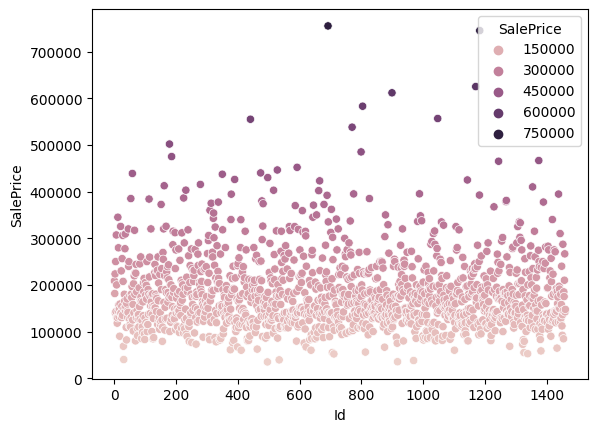

MSSubClass


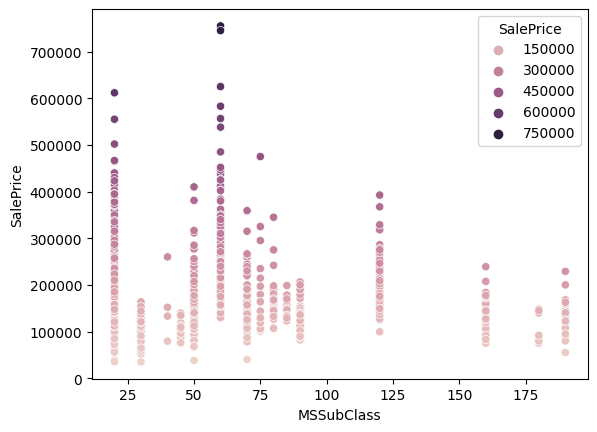

MSZoning


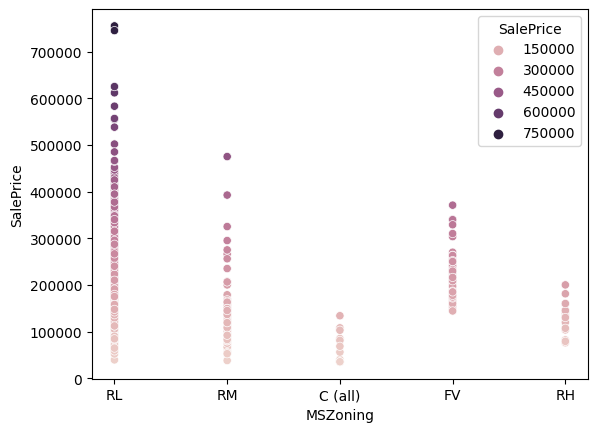

LotFrontage


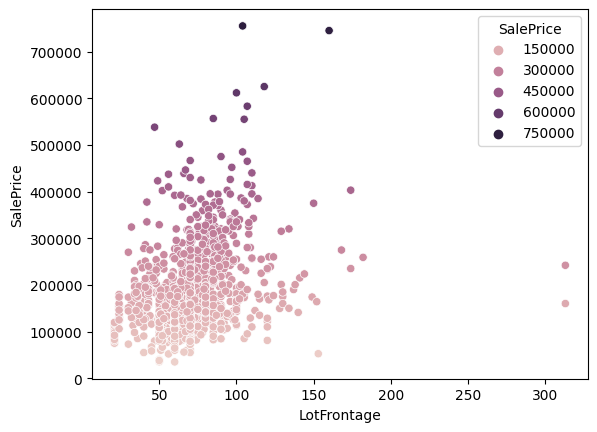

LotArea


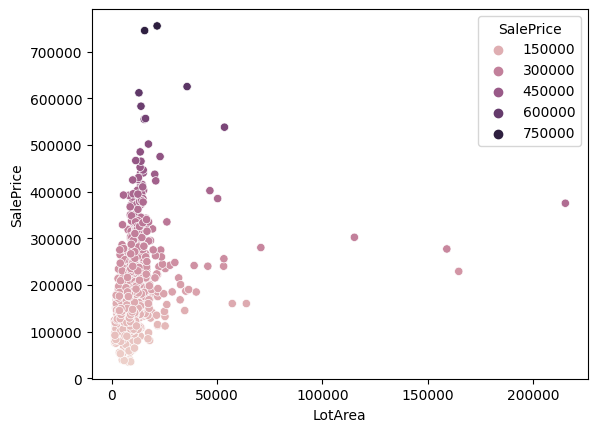

Street


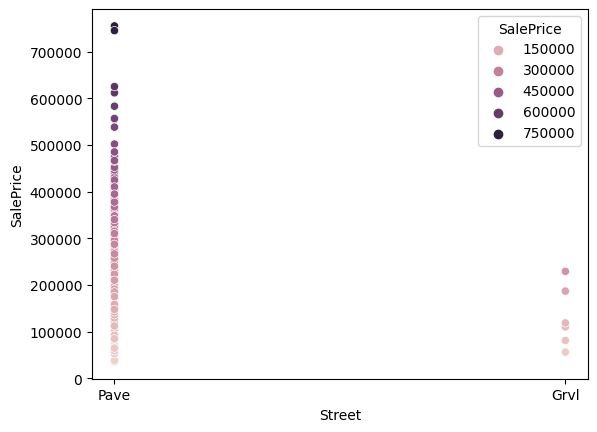

Alley


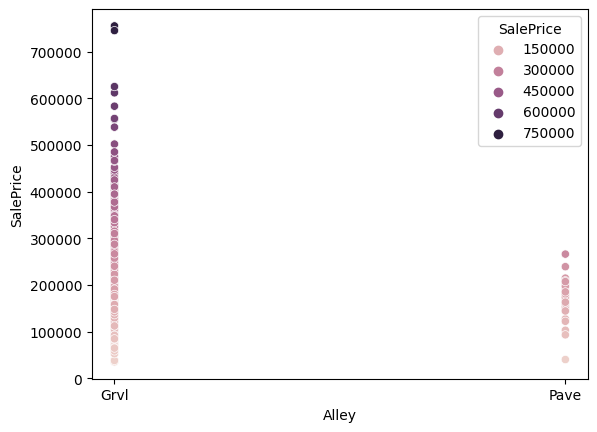

LotShape


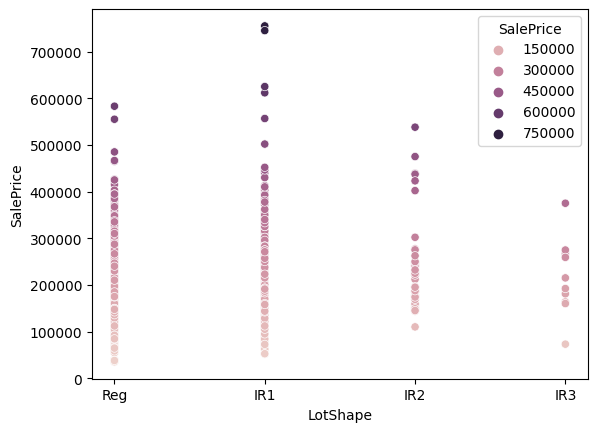

LandContour


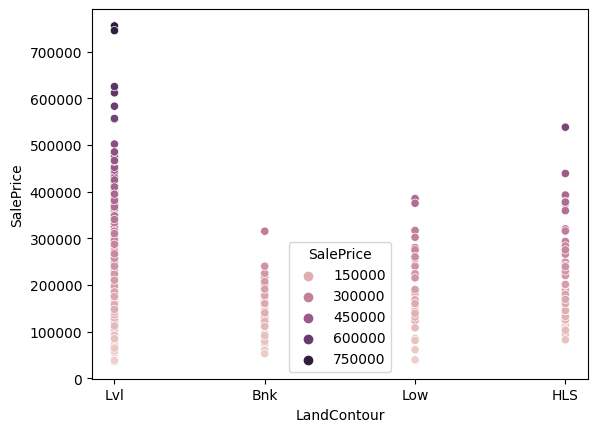

Utilities


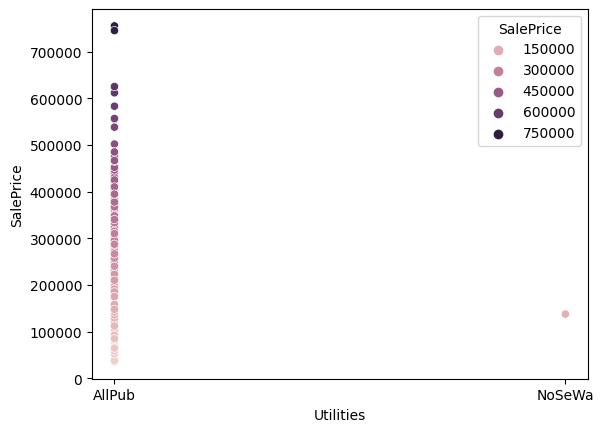

LotConfig


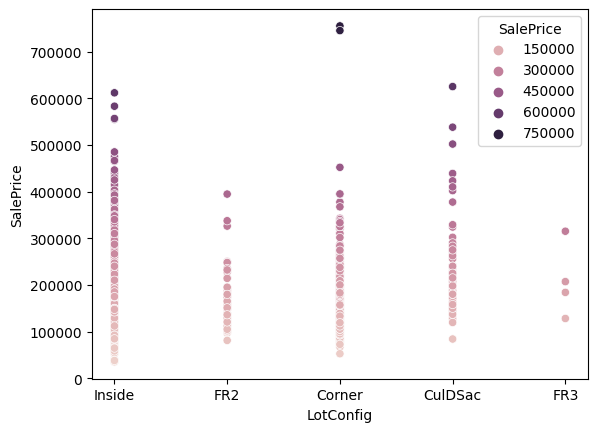

LandSlope


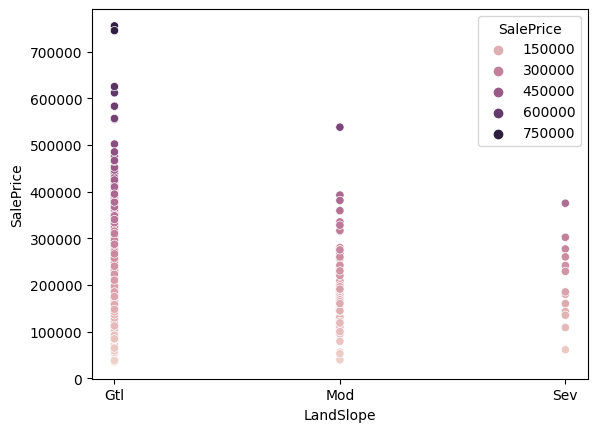

Neighborhood


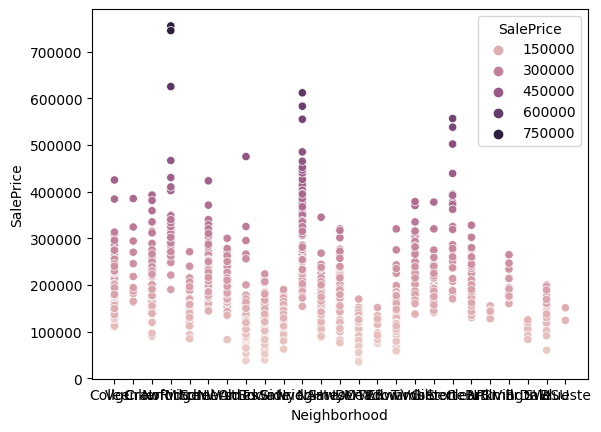

Condition1


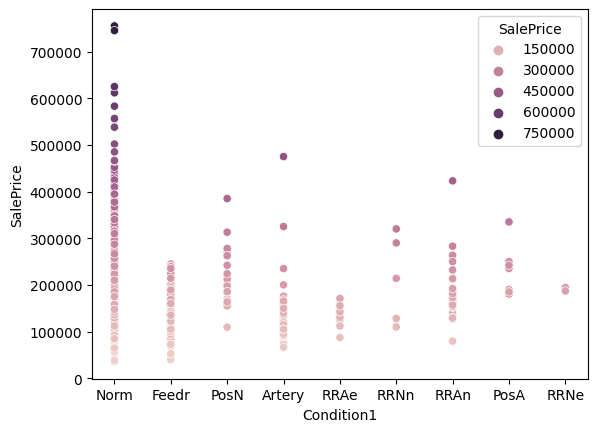

Condition2


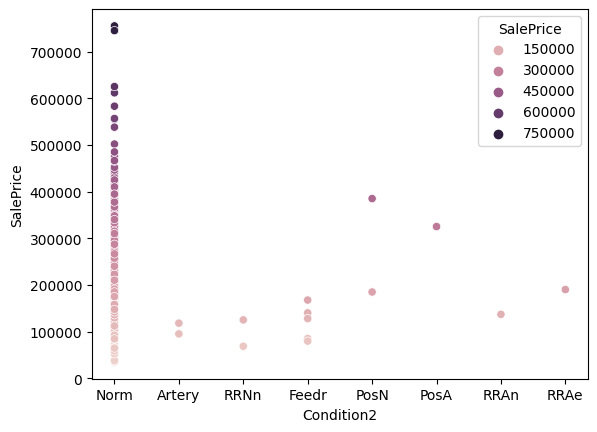

BldgType


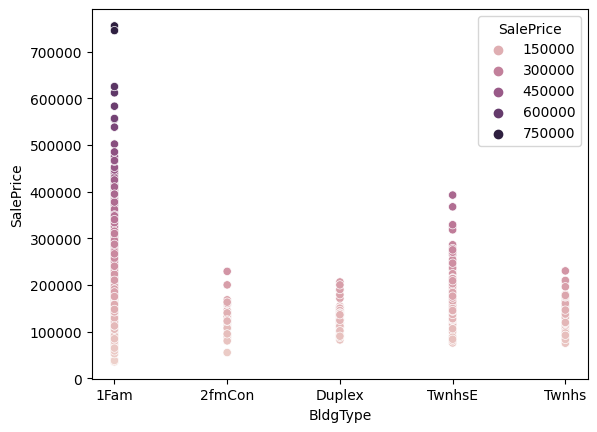

HouseStyle


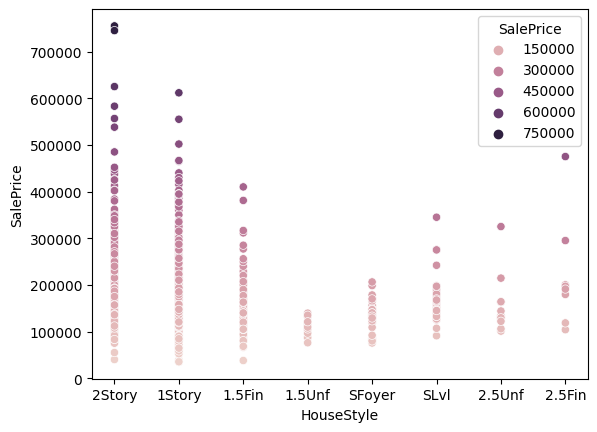

OverallQual


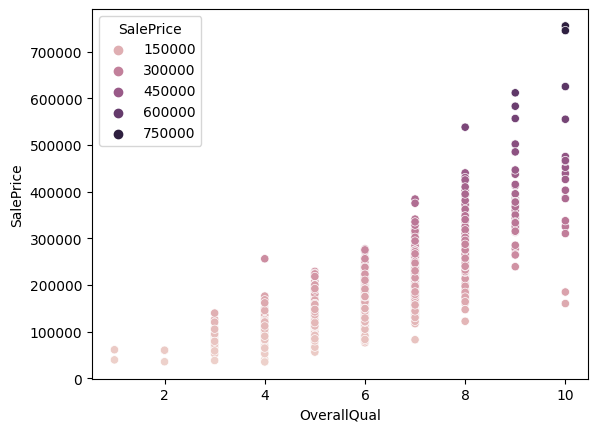

OverallCond


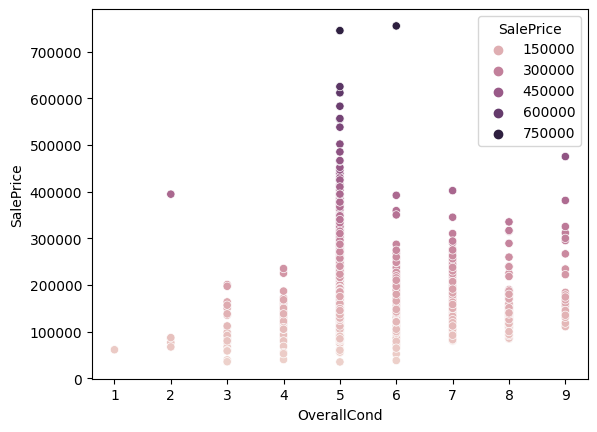

YearBuilt


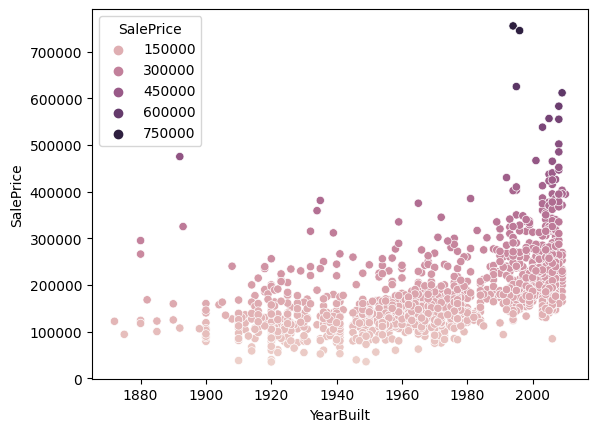

YearRemodAdd


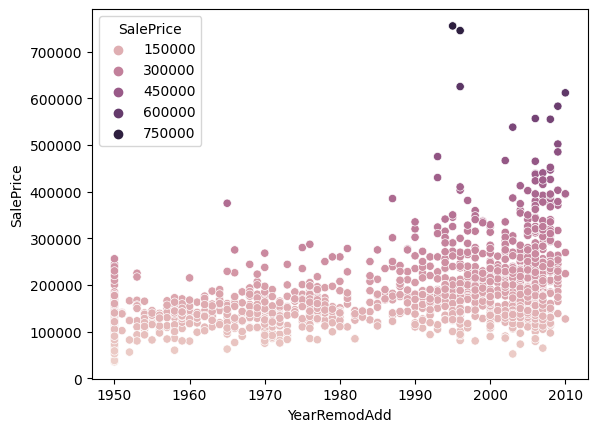

RoofStyle


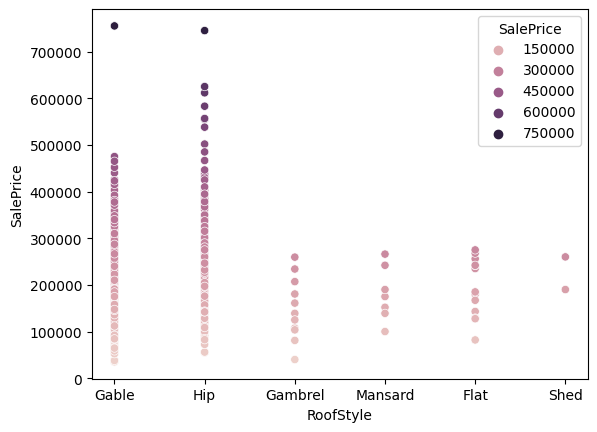

RoofMatl


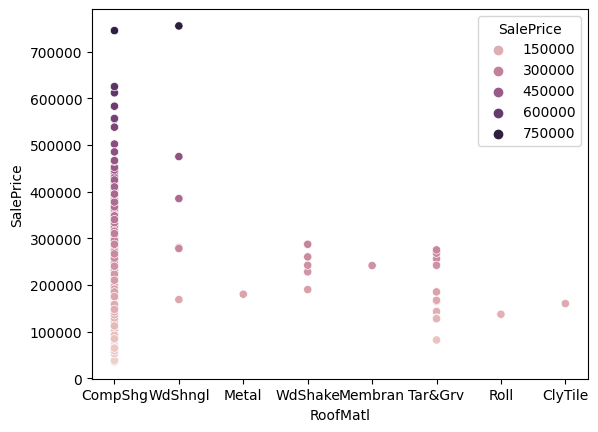

Exterior1st


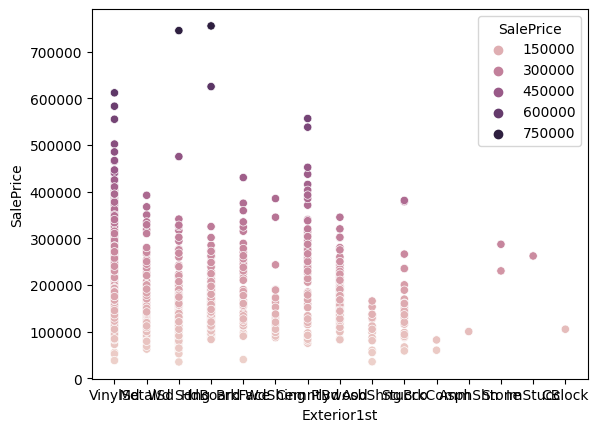

Exterior2nd


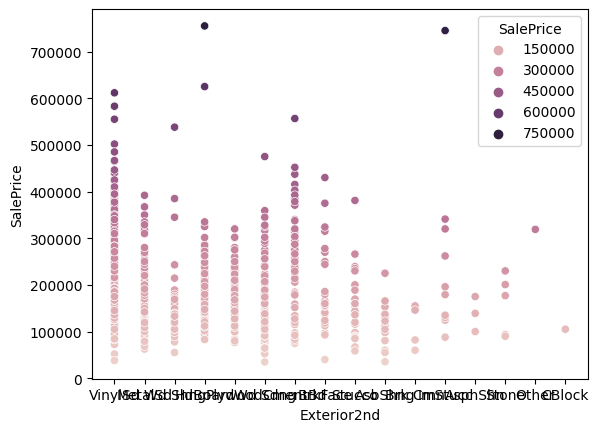

MasVnrType


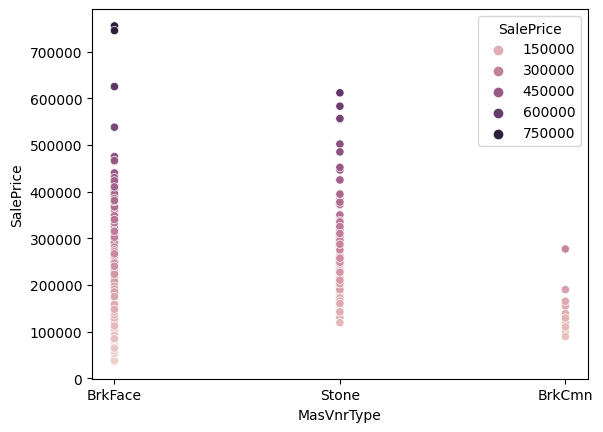

MasVnrArea


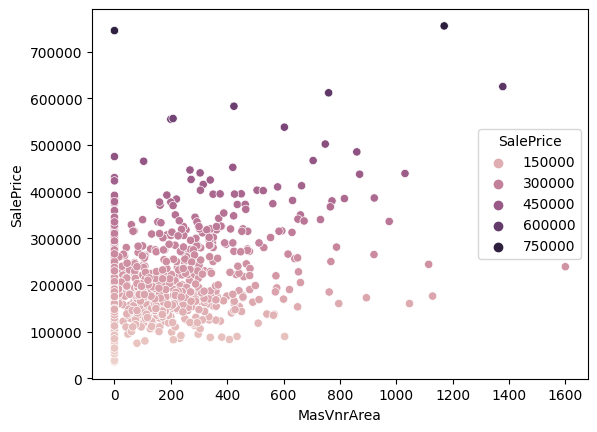

ExterQual


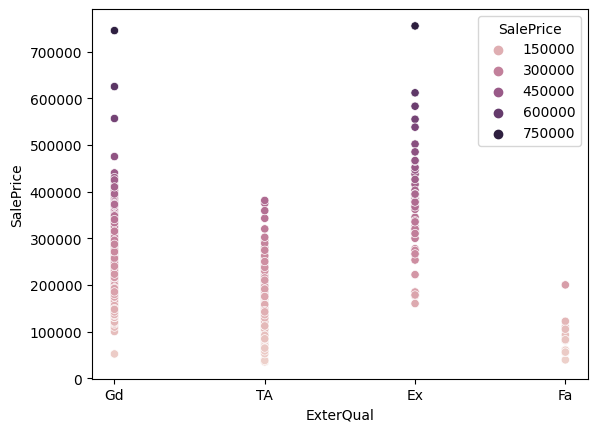

ExterCond


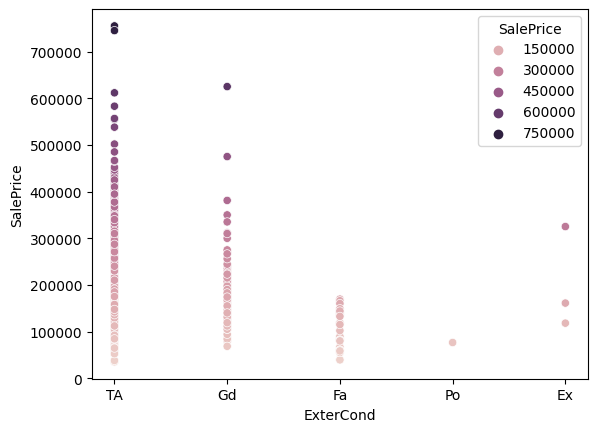

Foundation


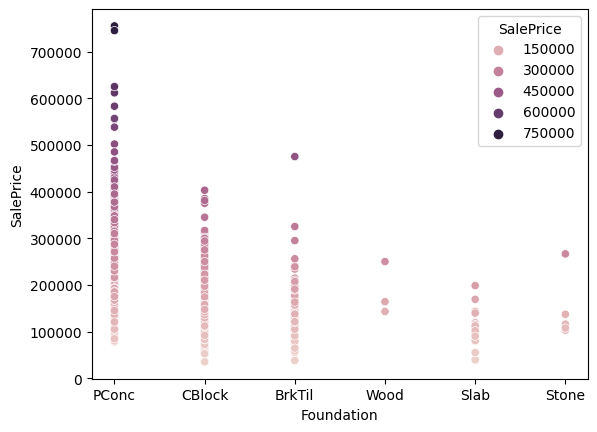

BsmtQual


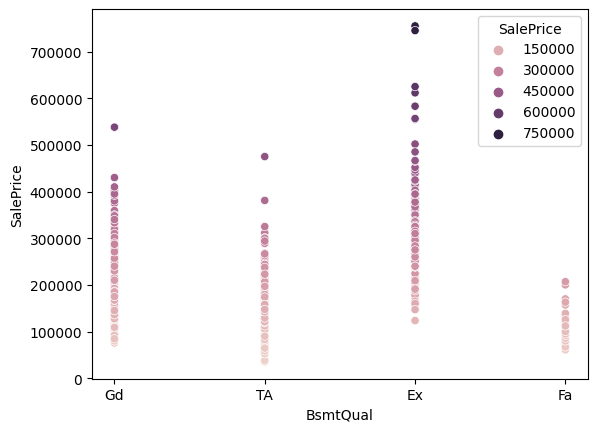

BsmtCond


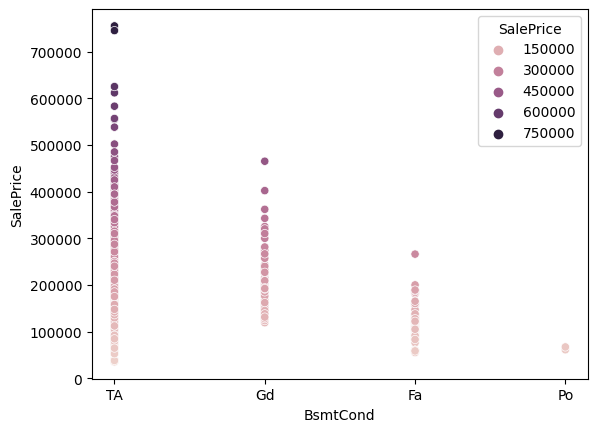

BsmtExposure


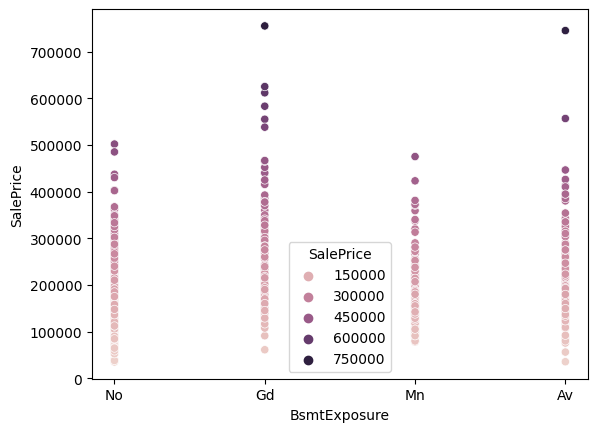

BsmtFinType1


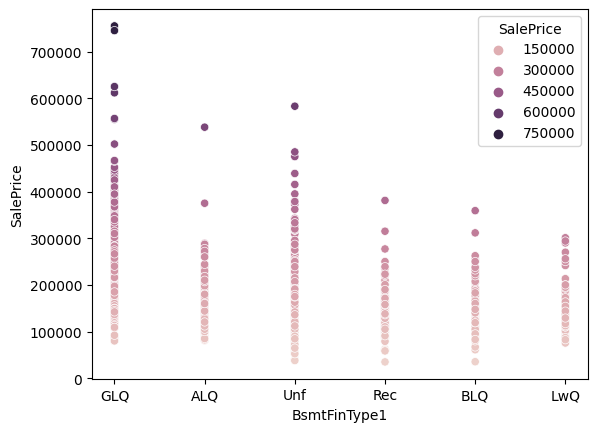

BsmtFinSF1


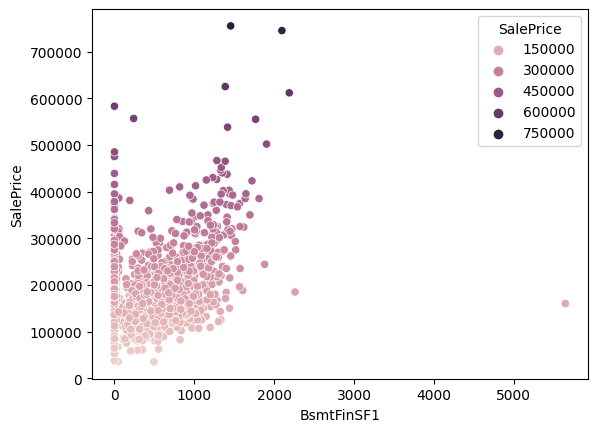

BsmtFinType2


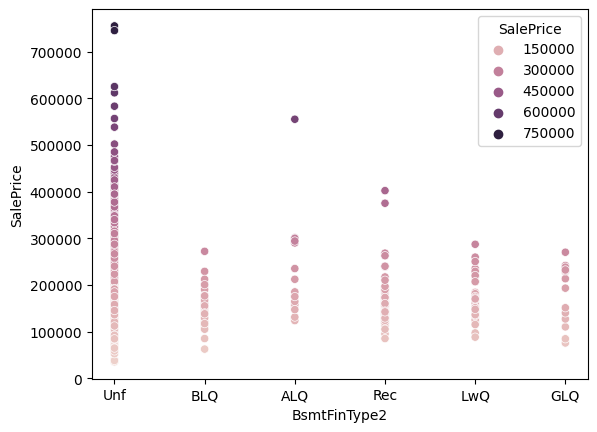

BsmtFinSF2


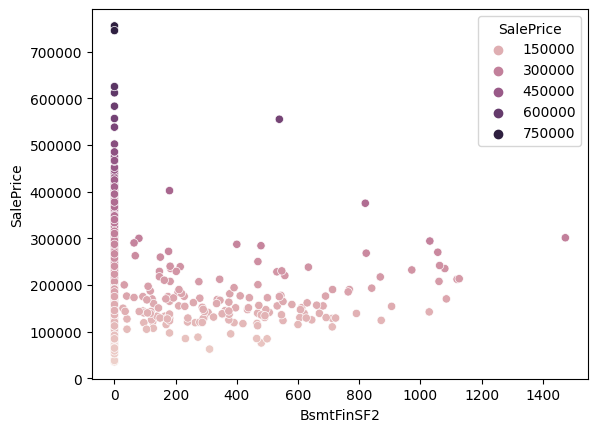

BsmtUnfSF


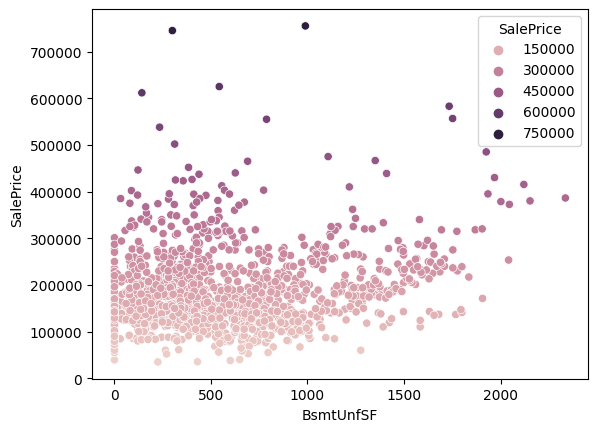

TotalBsmtSF


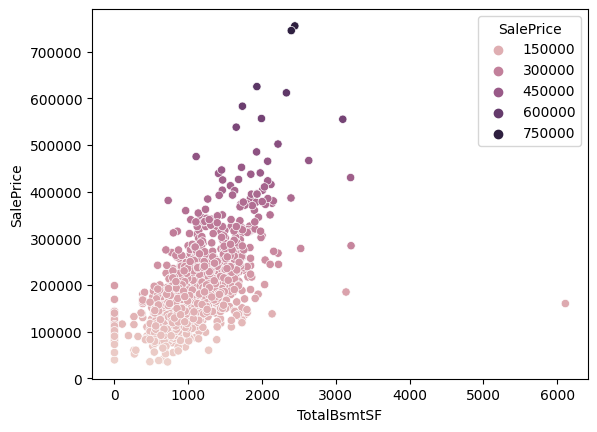

Heating


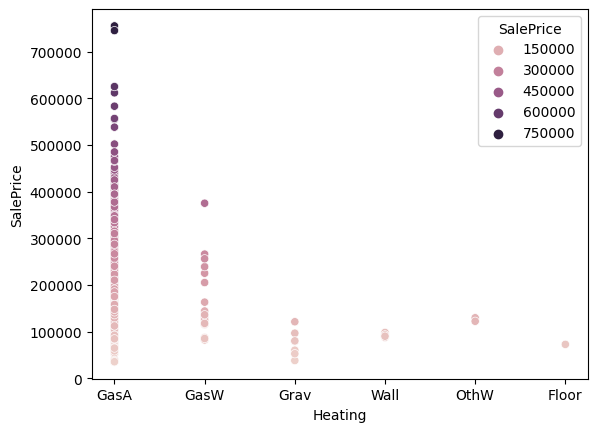

HeatingQC


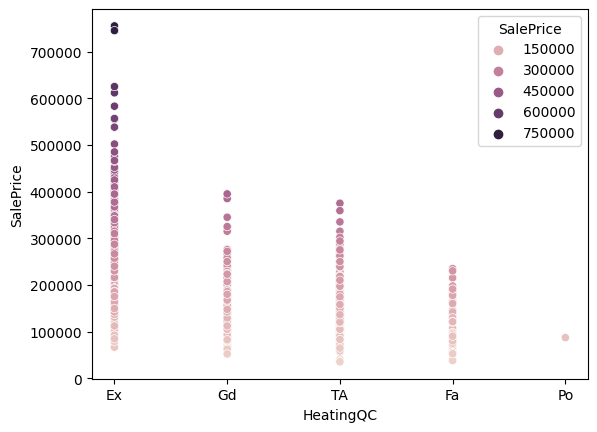

CentralAir


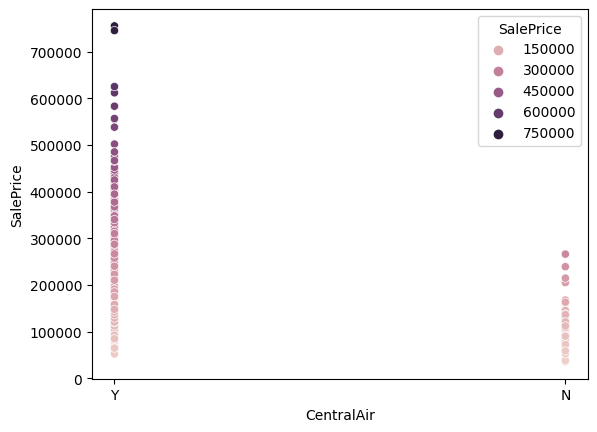

Electrical


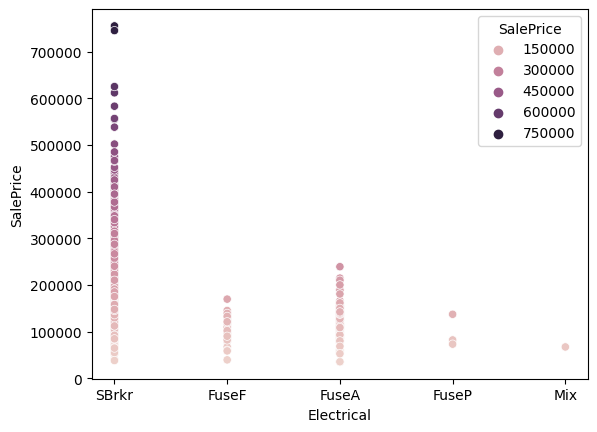

1stFlrSF


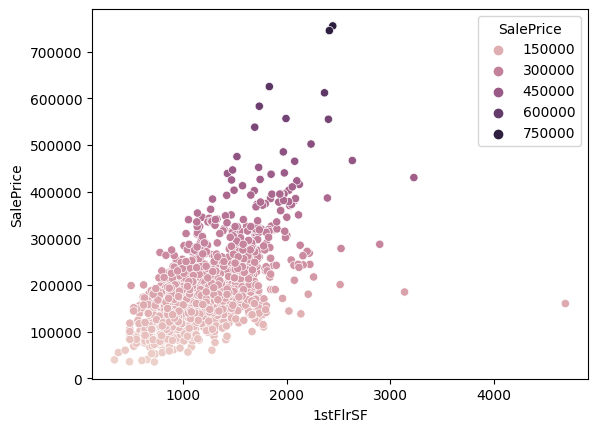

2ndFlrSF


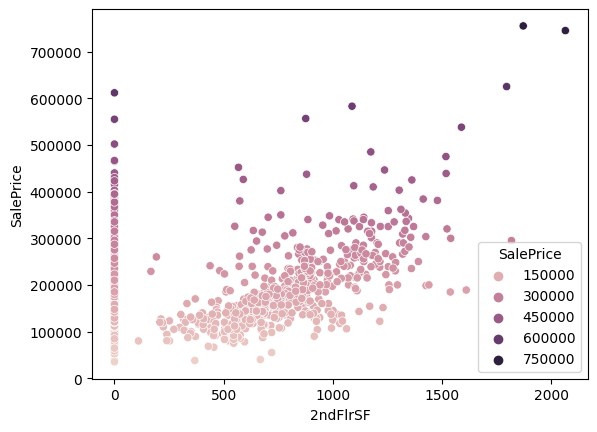

LowQualFinSF


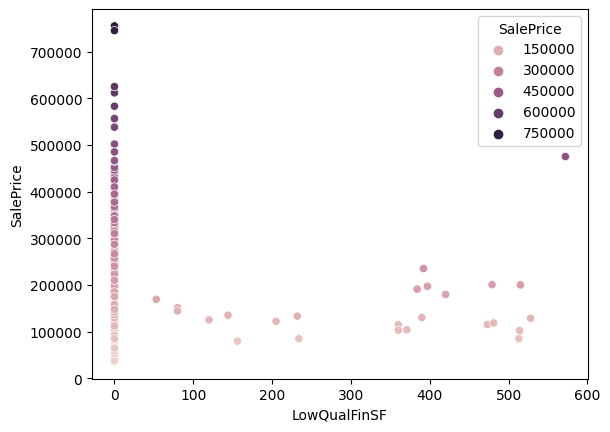

GrLivArea


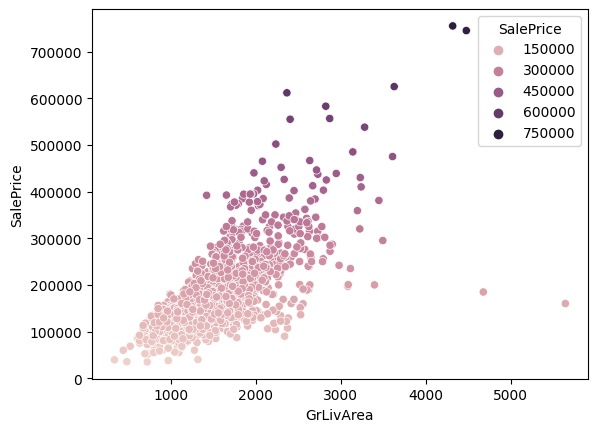

BsmtFullBath


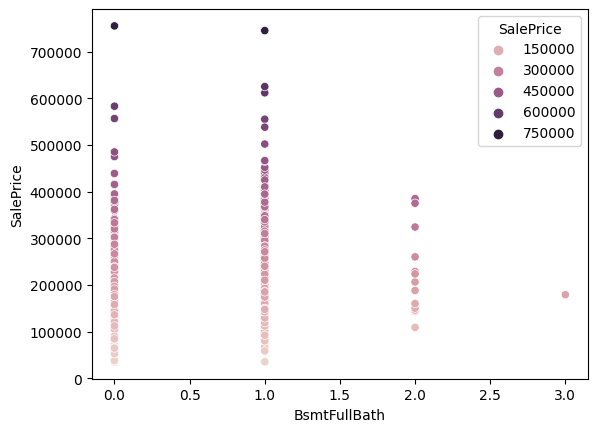

BsmtHalfBath


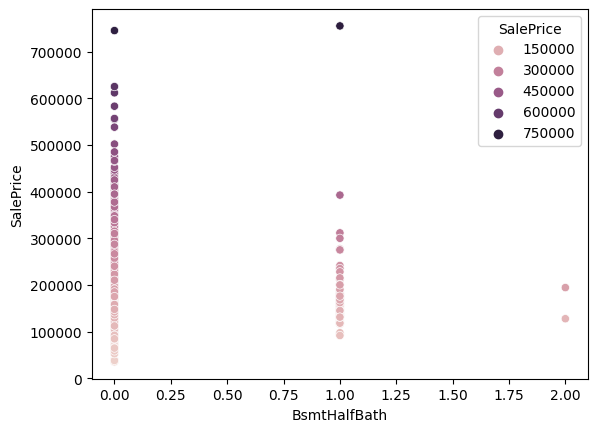

FullBath


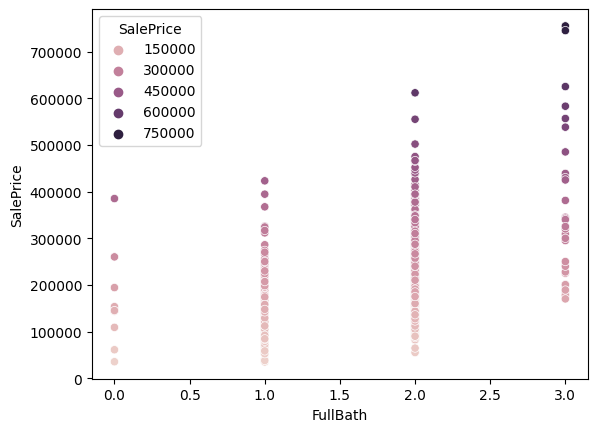

HalfBath


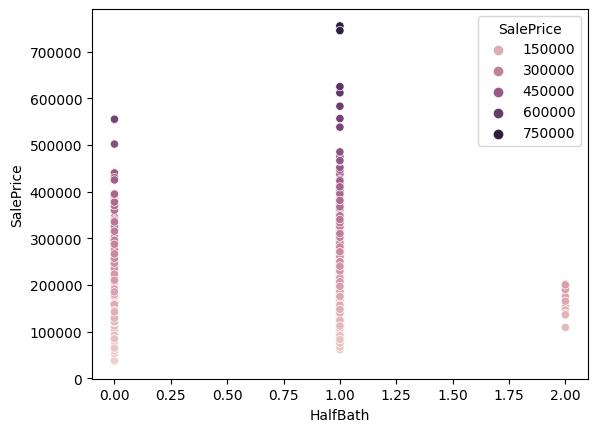

BedroomAbvGr


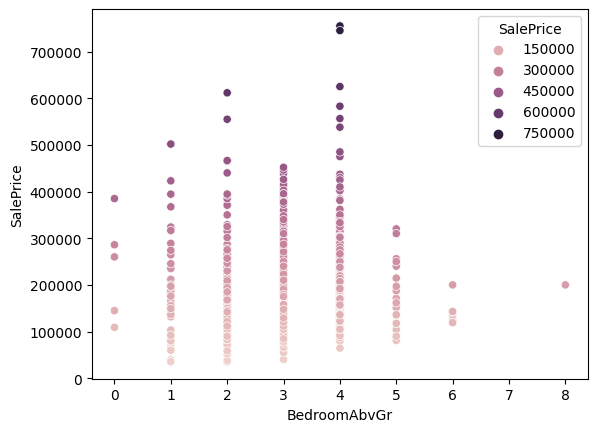

KitchenAbvGr


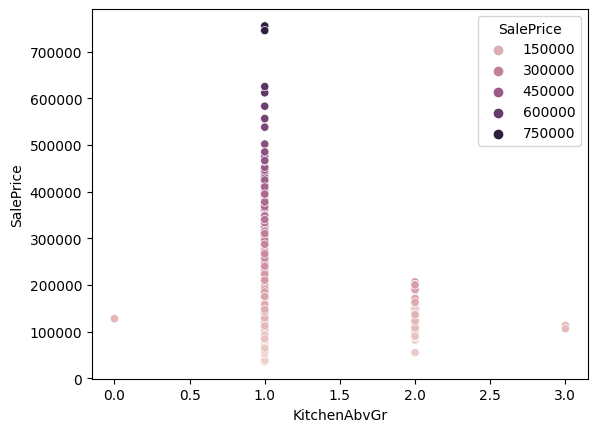

KitchenQual


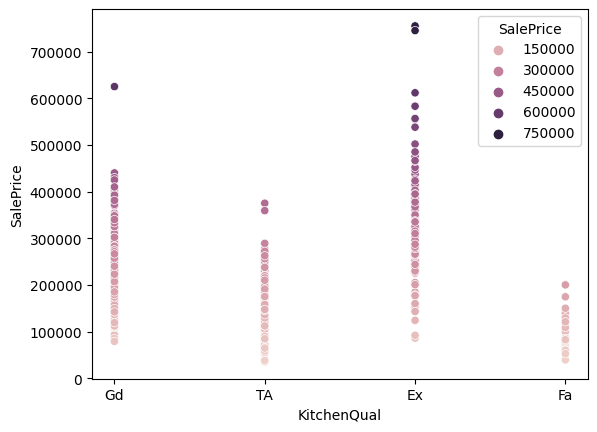

TotRmsAbvGrd


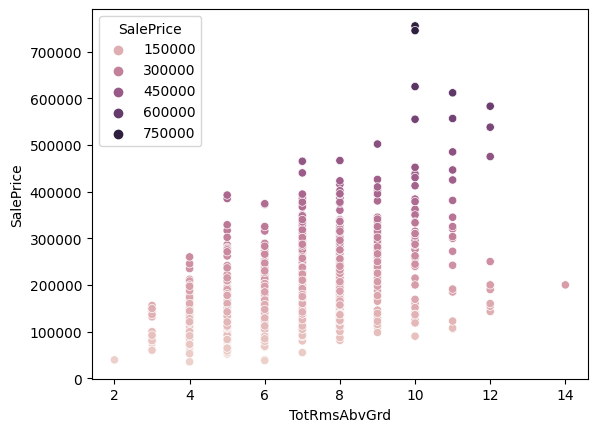

Functional


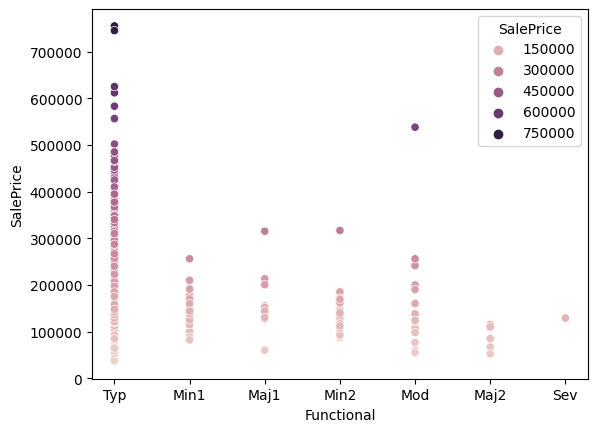

Fireplaces


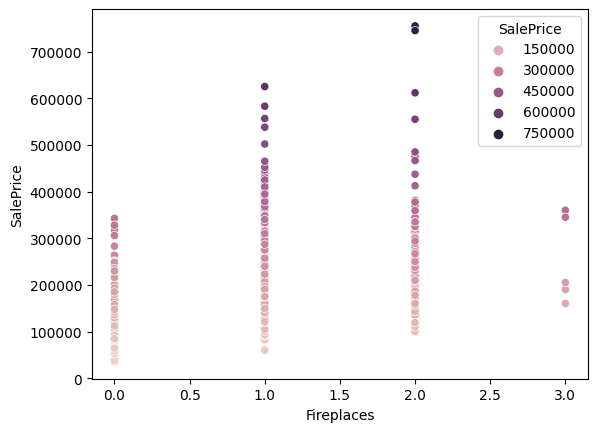

FireplaceQu


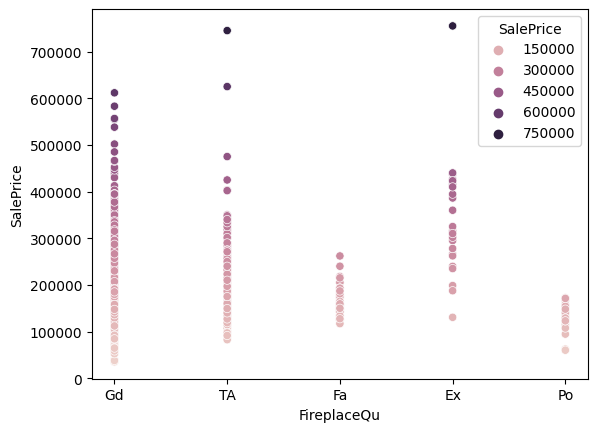

GarageType


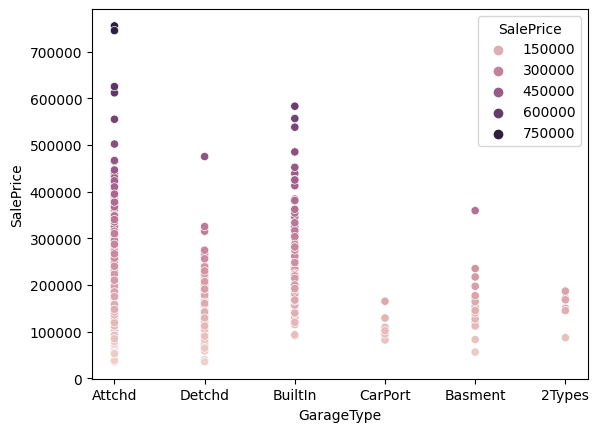

GarageYrBlt


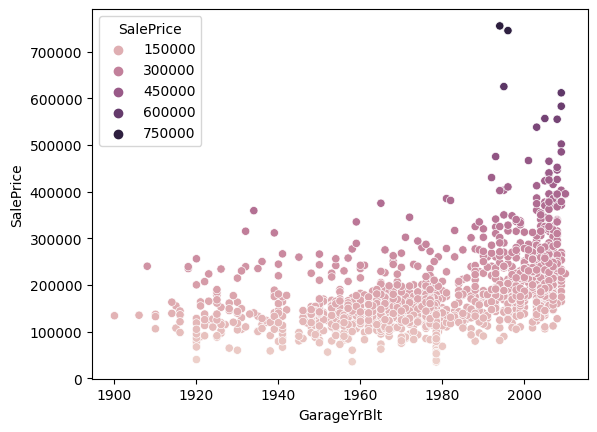

GarageFinish


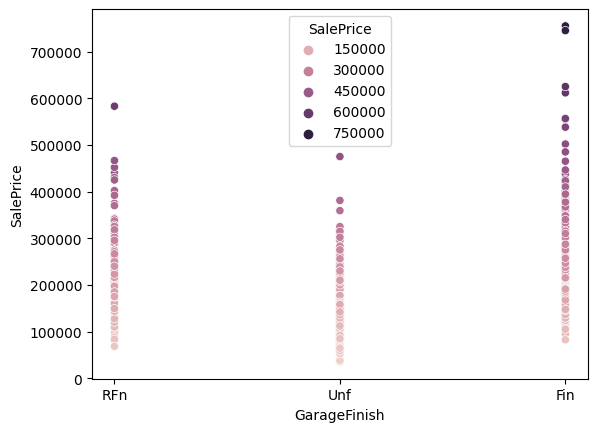

GarageCars


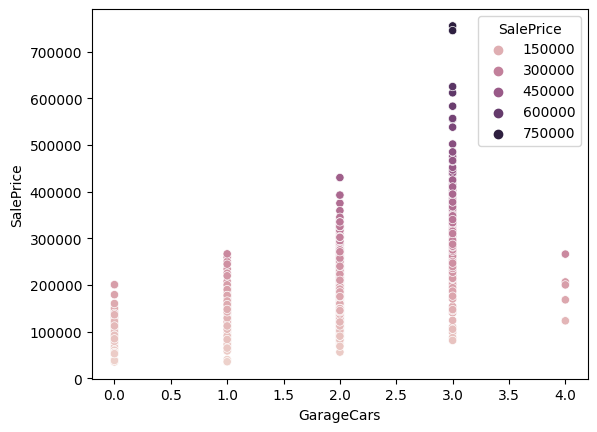

GarageArea


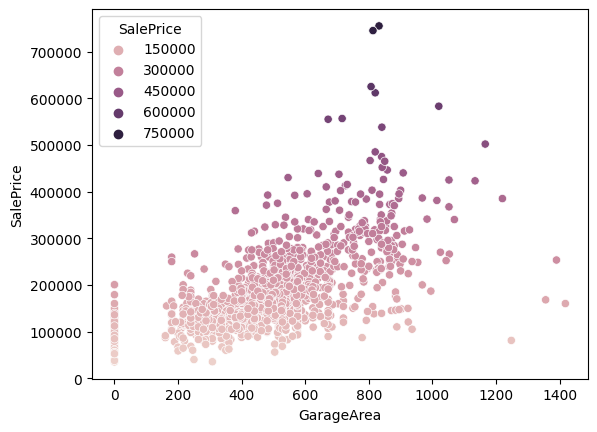

GarageQual


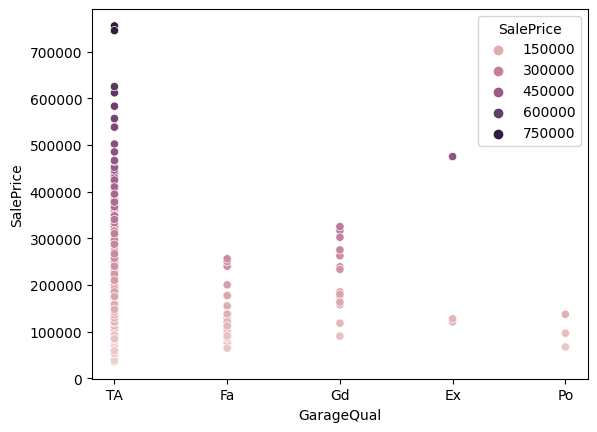

GarageCond


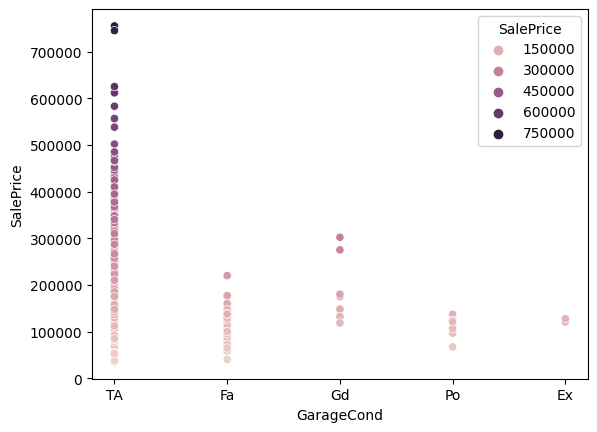

PavedDrive


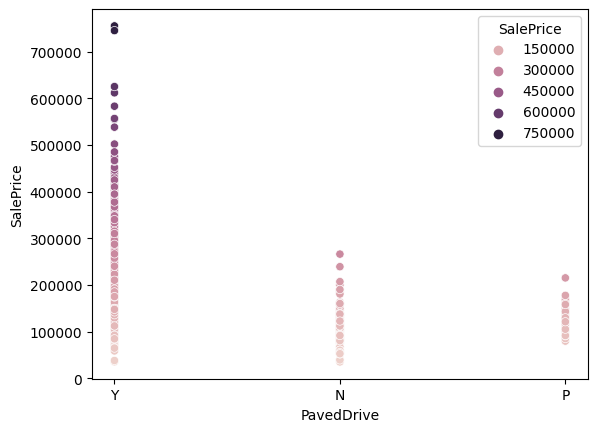

WoodDeckSF


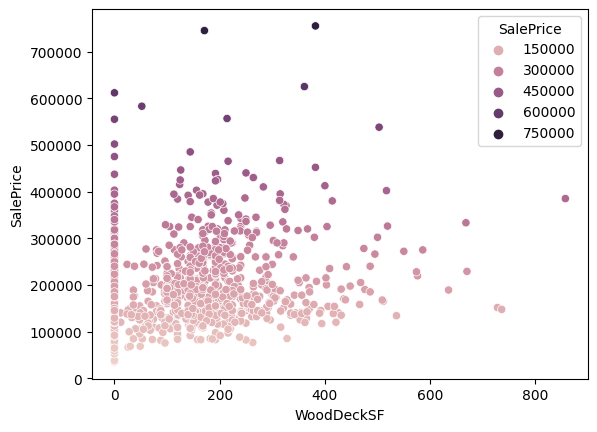

OpenPorchSF


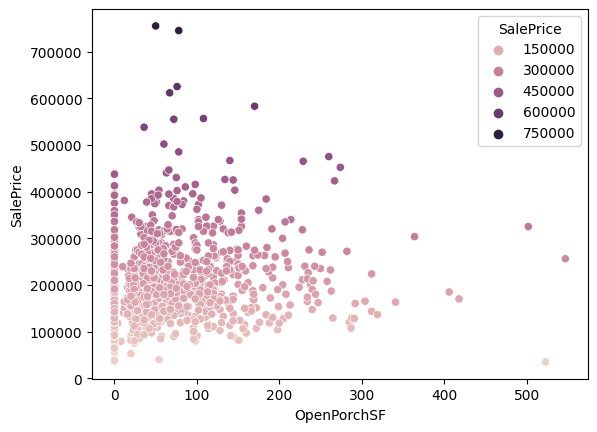

EnclosedPorch


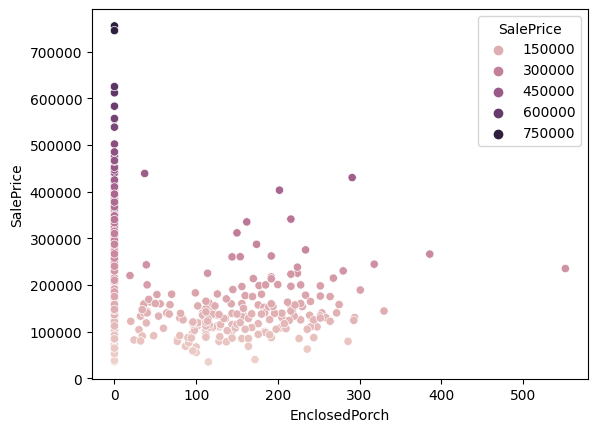

3SsnPorch


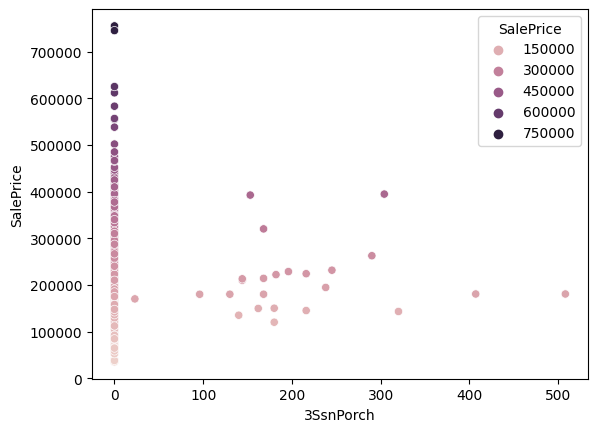

ScreenPorch


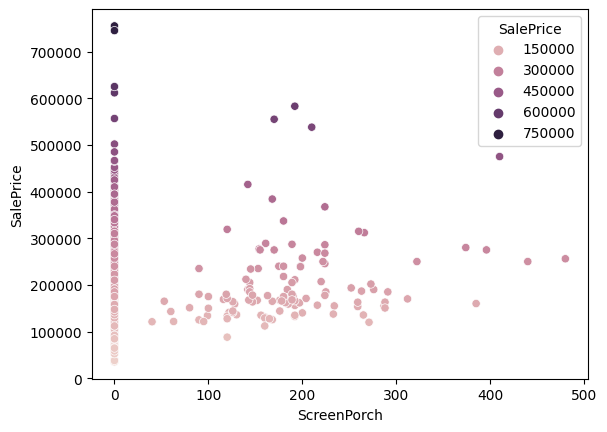

PoolArea


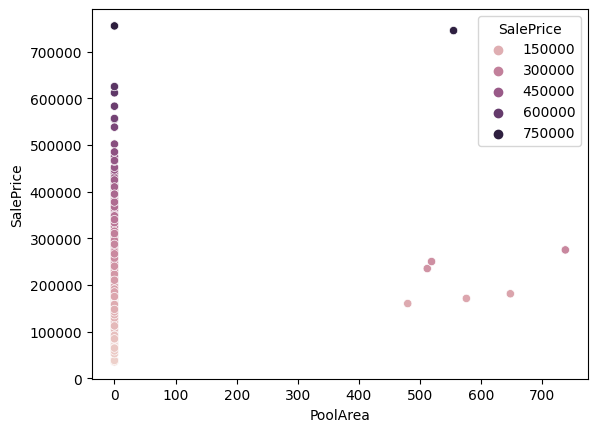

PoolQC


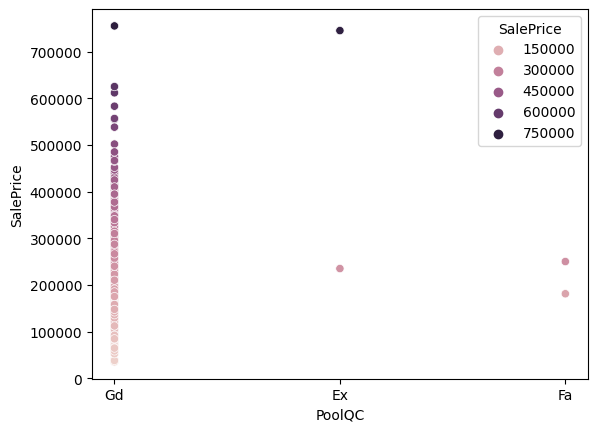

Fence


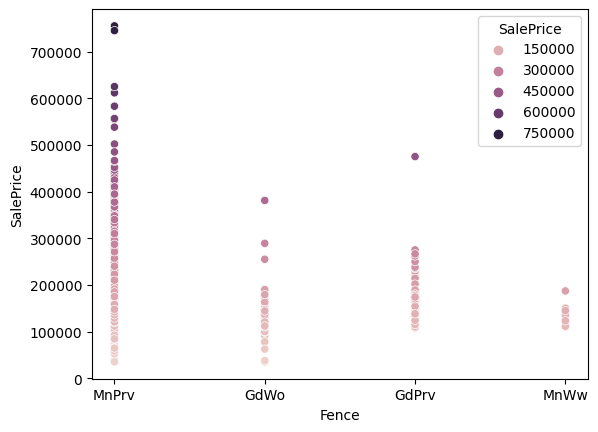

MiscFeature


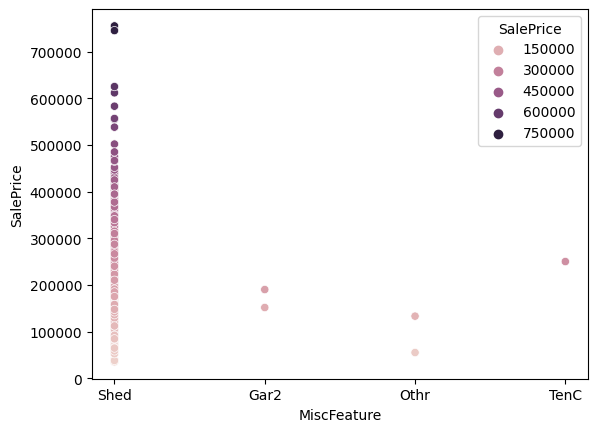

MiscVal


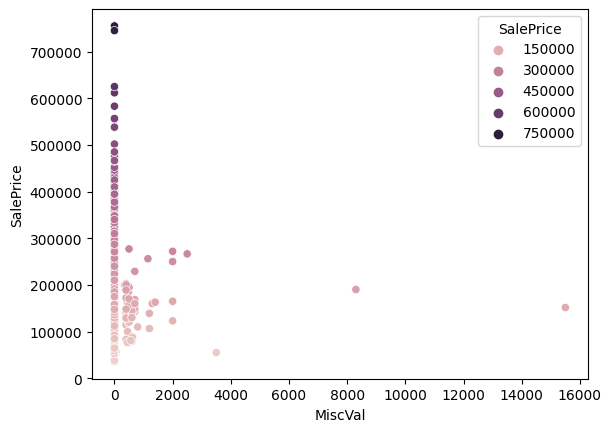

MoSold


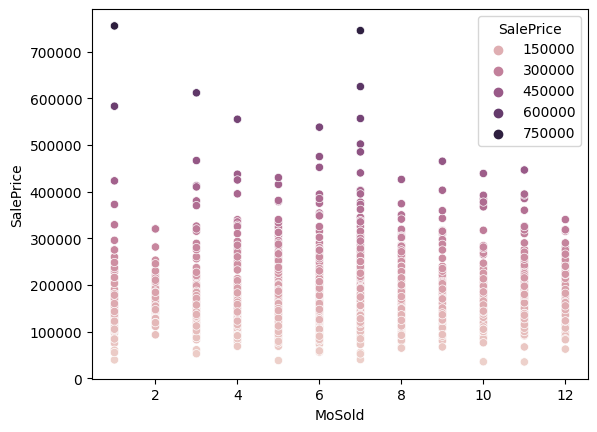

YrSold


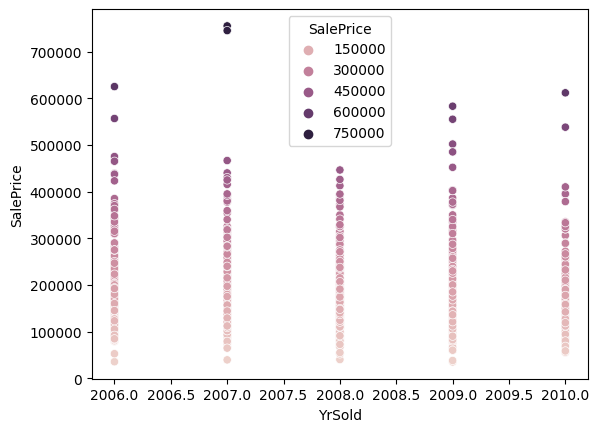

SaleType


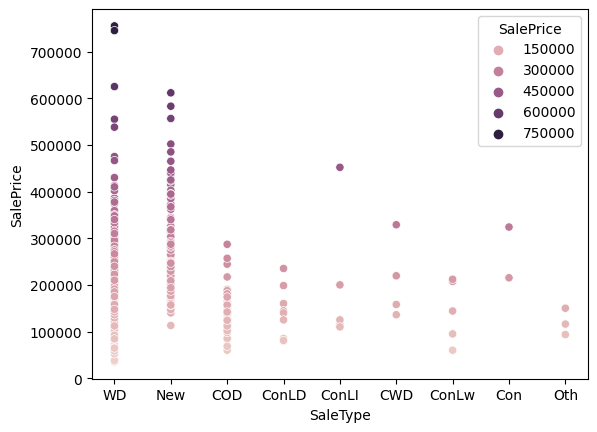

SaleCondition


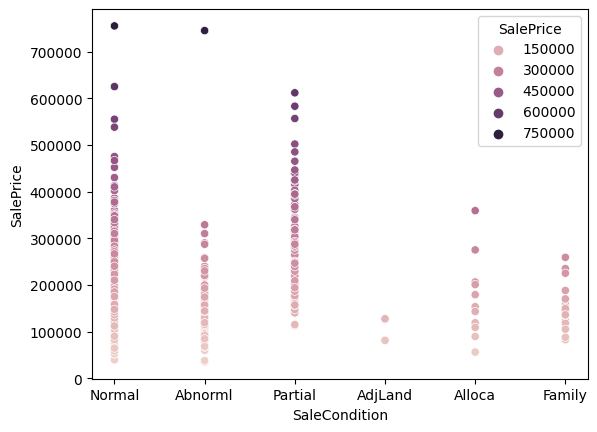

SalePrice


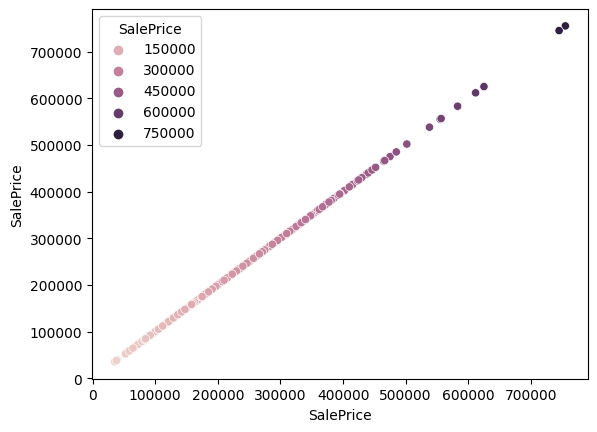

In [8]:
for col_name in train_data.columns:
    print(col_name)
    sns.scatterplot(train_data, x=col_name, y='SalePrice', hue='SalePrice')
    plt.show()

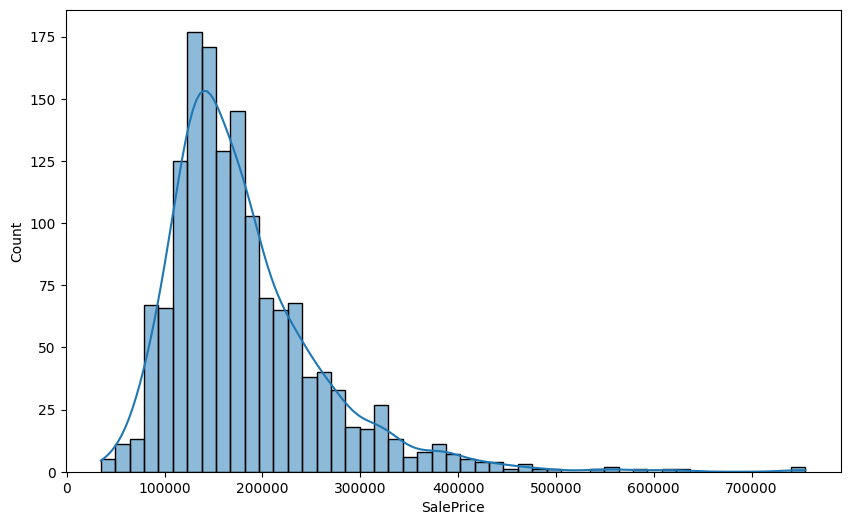

In [9]:
# Sale price distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.show()

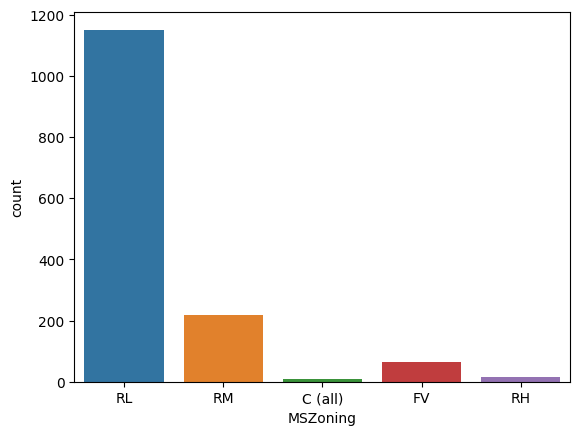

In [10]:
sns.countplot(data=train_data, x='MSZoning')
plt.show()

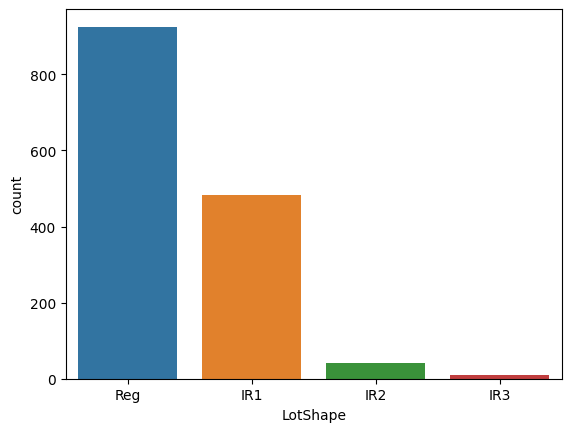

In [11]:
sns.countplot(data=train_data, x='LotShape')
plt.show()

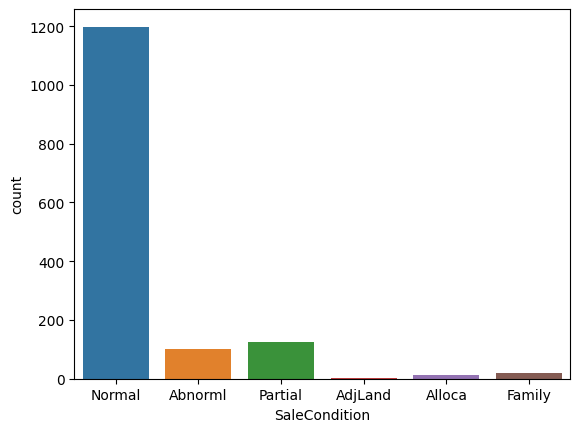

In [12]:
sns.countplot(data=train_data, x='SaleCondition')
plt.show()

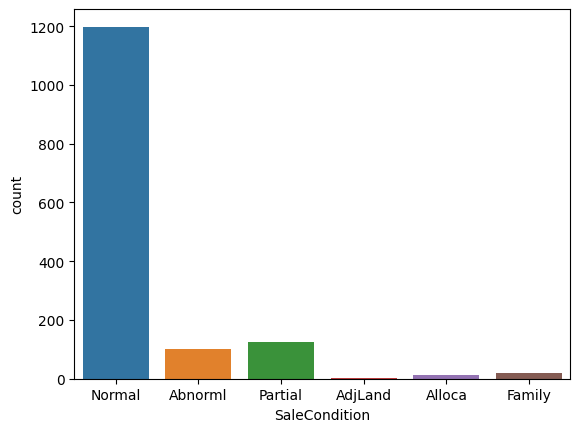

In [13]:
sns.countplot(data=train_data, x='SaleCondition')
plt.show()

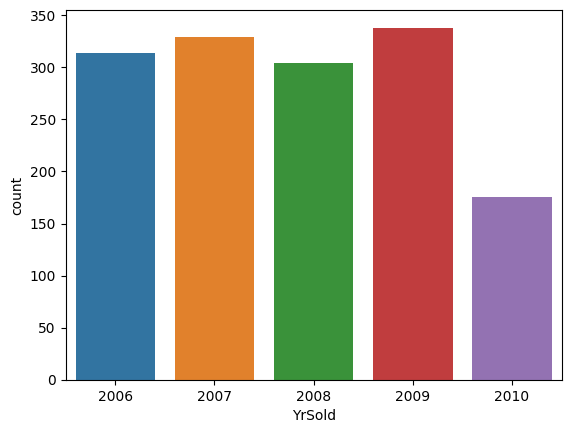

In [14]:
sns.countplot(data=train_data, x='YrSold')
plt.show()

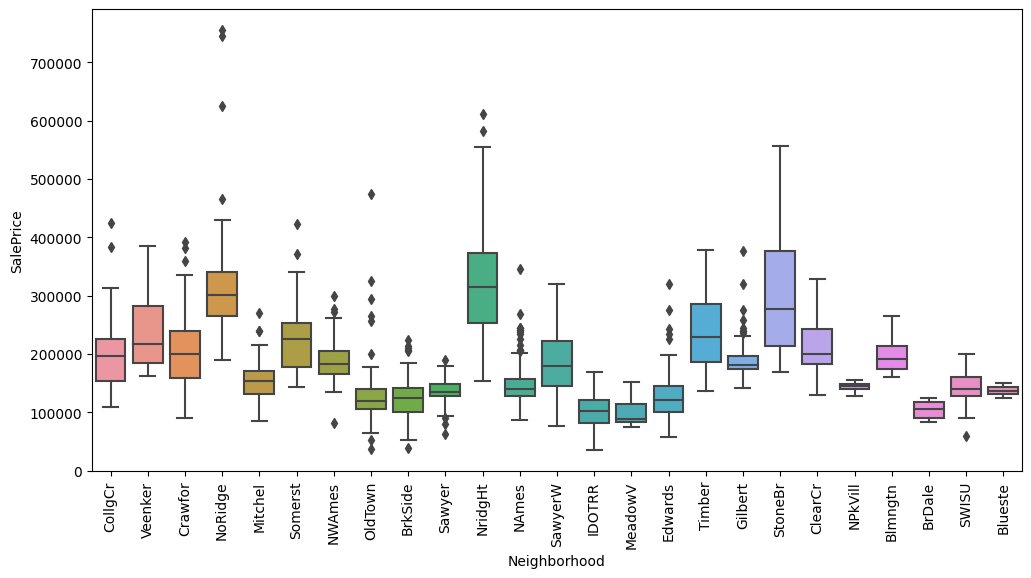

In [15]:
# Neighborhood vs. Sale Price
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.xticks(rotation=90)
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

models = [
    ('LiR', LinearRegression()),
#     ('LoR', LogisticRegression()),
    ('KNN', KNeighborsRegressor(n_neighbors=8)),
#     ('LSV', LinearSVR()),
#     ('SVR', SVR()),
    ('RFR', RandomForestRegressor(n_estimators=128)),
    ('GBR', GradientBoostingRegressor(n_estimators=128)),
    ('LGB', LGBMRegressor()),
]

In [17]:
def nullDataCleanup(df):
    numerical_featurs = ['LotFrontage', 'MasVnrArea', 'OverallQual', 'GarageYrBlt', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
    df[numerical_featurs] = df[numerical_featurs].fillna(train_data[numerical_featurs].mean())

    # For categorical_features

    enum_features = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                             'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish',
                             'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

    df[enum_features] = df[enum_features].fillna(train_data[enum_features].mode().iloc[0])

In [18]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
data.dropna(subset=['SalePrice'], inplace=True)
# data.fillna(0, inplace=True)

# test df cleanup
#test_data.fillna(0, inplace=True)
nullDataCleanup(data)
nullDataCleanup(test_data)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Grvl      Reg   
1   2          20       RL         80.0     9600   Pave  Grvl      Reg   
2   3          60       RL         68.0    11250   Pave  Grvl      IR1   
3   4          70       RL         60.0     9550   Pave  Grvl      IR1   
4   5          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
2         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
3         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
4         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [19]:
test_data.isna().sum()[test_data.isna().sum()>0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageArea      1
SaleType        1
dtype: int64

In [20]:
data.isna().sum()[data.isna().sum()>0]

Series([], dtype: int64)

In [21]:
# Features selection
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt',]
X = data[features]
y = data['SalePrice']
xt_test= test_data[features]

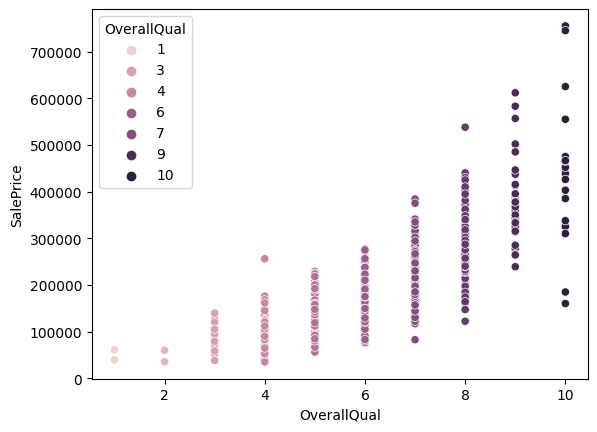

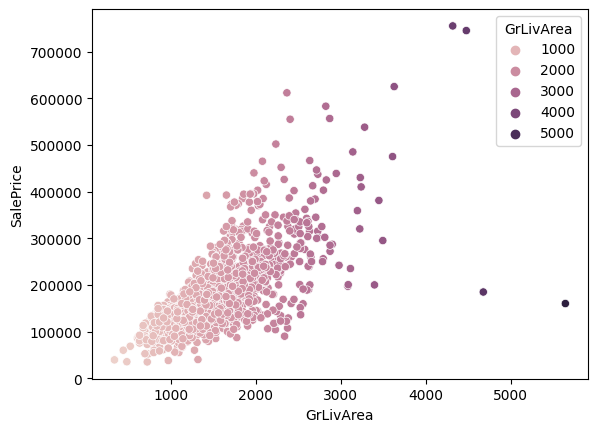

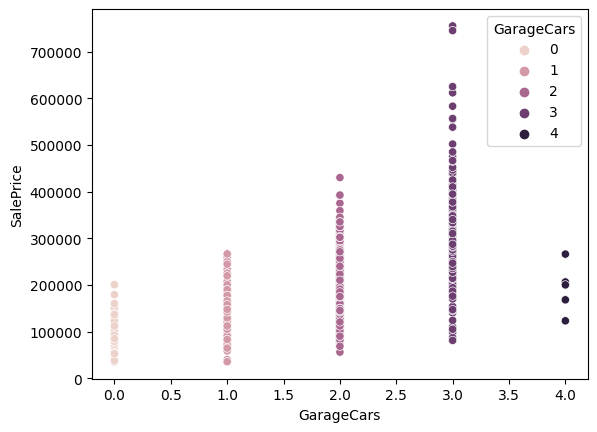

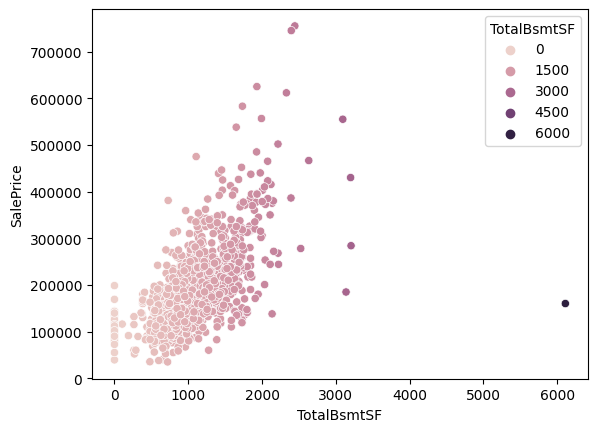

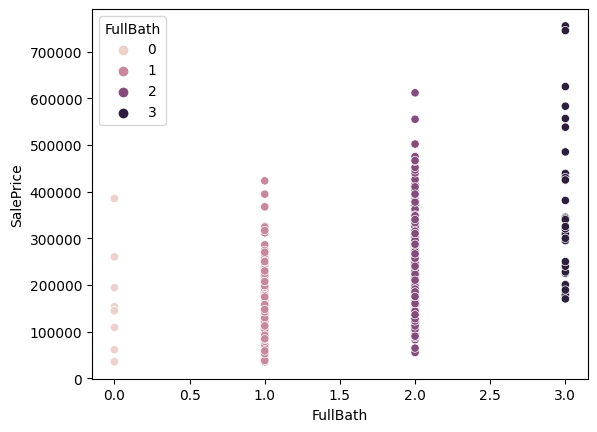

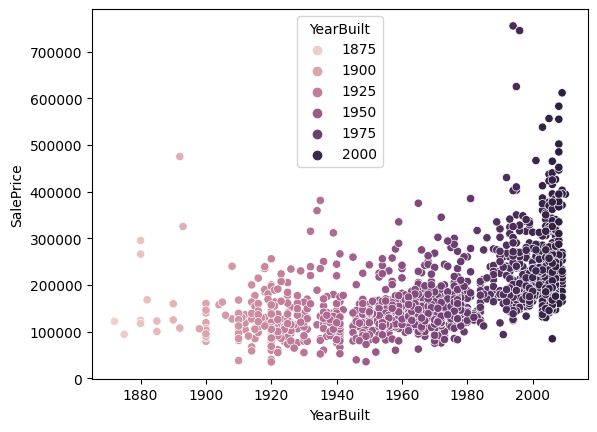

In [22]:
for col_name in features:
    sns.scatterplot(train_data, x=col_name, y='SalePrice', hue=col_name)
    plt.show()

In [23]:
# Feature scaling
# scacler = StandardScaler()
# x_scaled = scacler.fit_transform(X)
# xt_test_sc = scacler.fit_transform(xt_test)
x_scaled = X
xt_test_sc = xt_test

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=42)

LiR
Mean Squared Error (MSE): 1879220094.87
Mean Absolute Error (MAE): 25270.17
R-squared (R2): 0.79


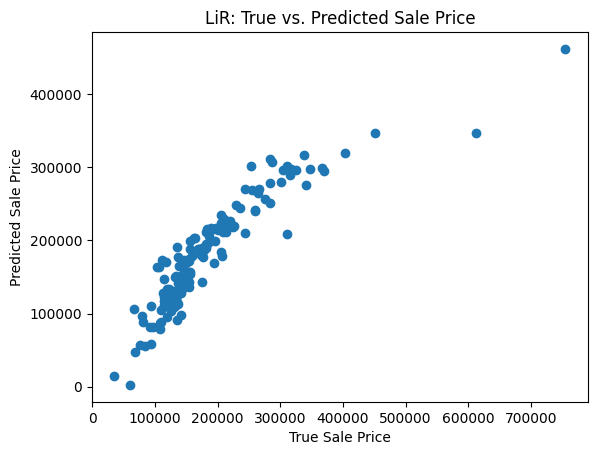

KNN
Mean Squared Error (MSE): 2840705889.72
Mean Absolute Error (MAE): 30852.24
R-squared (R2): 0.69


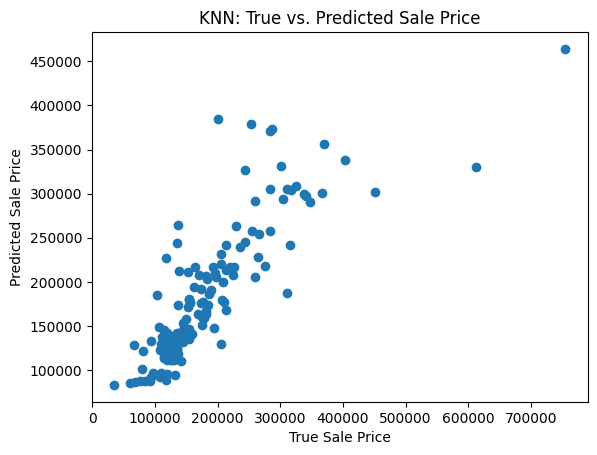

RFR
Mean Squared Error (MSE): 895925932.62
Mean Absolute Error (MAE): 18854.49
R-squared (R2): 0.90


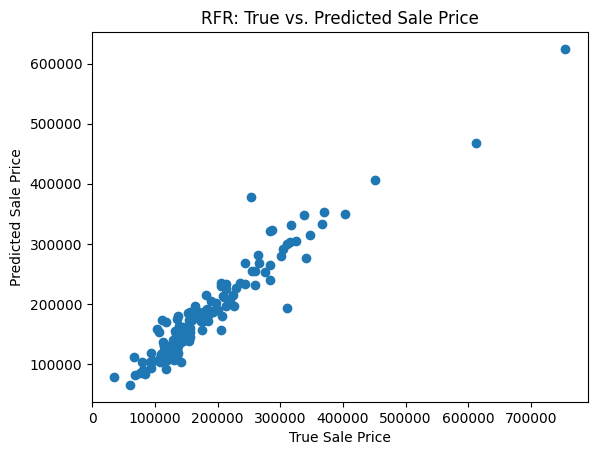

GBR
Mean Squared Error (MSE): 719370363.79
Mean Absolute Error (MAE): 16565.02
R-squared (R2): 0.92


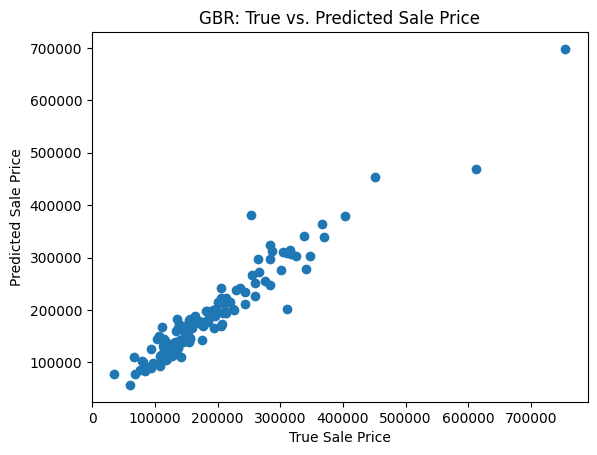

LGB
Mean Squared Error (MSE): 1228002556.24
Mean Absolute Error (MAE): 19584.86
R-squared (R2): 0.87


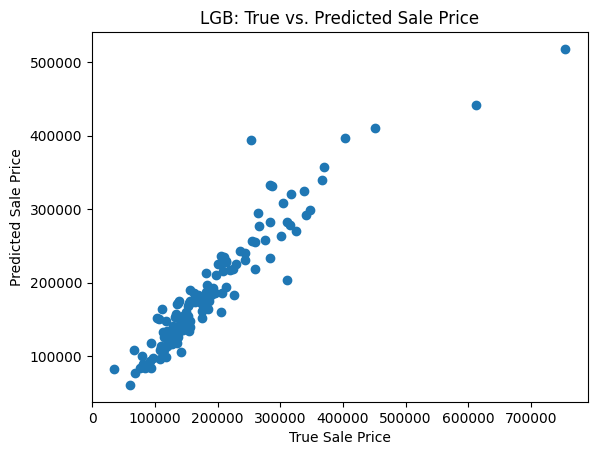

In [25]:
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(name)
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Sale Price")
    plt.ylabel("Predicted Sale Price")
    plt.title(f"{name}: True vs. Predicted Sale Price")
    plt.show()
    
    output = model.predict(xt_test_sc)
    
    arr = test_data.loc[:,'Id']
    output_df = pd.DataFrame({'Id':arr, 'SalePrice': output.flatten()})
    output_df.to_csv(f'/kaggle/working/{name}-output.csv', encoding='utf-8', index=False)